## TECHNICAL TEST  - METRODATA

PT ABC adalah perusahaan yang bergerak di bidang produksi roti. Hasil produksi didistibusikan ke berbagai outlet atau store rekanan. Perusahaan tersebut kerap mengalami masalah karena banyak roti yang tidak terjual, sehingga produk retur karena kedalursa cukup banyak. Anda sebagai Data Scientist diminta untuk memberikan solusi berbasis machine learning yang dapat memberikan rekomendasi berupa jumlah unit roti atau order quantity yang sebaiknya dititipkan ke setiap outlet. Gunakan dataset terlampir dan lakukan demand forecasting per store secara harian. Point yg dinilai berupa presentasi hasil yang memuat:
1.	Hasil forecast untuk demand selama 7 hari dan 30 hari kedepan
2.	Penjelasan workflow machine learning yang dibuat
3.	Gunakan 2 jenis algoritma yaitu Time series dan Regresi dan masing-masing algoritma gunakan minimal 2 alternatif model
4.	Summary model performance 

In [174]:
!pip install prophet

     ---------------------------------------- 13.3/13.3 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 93.7/93.7 kB 887.8 kB/s eta 0:00:00
  Using cached holidays-0.42-py3-none-any.whl (917 kB)



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [176]:
# Import common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import tqdm

In [14]:
# Read excel dataset
df = pd.read_excel("../raw/dataset.xls")

In [15]:
df.head()

,date,order_qty,product_id,store
0,20180626,0.416667,A1,7079
1,20180626,0.416667,A1,7088
2,20180609,0.208333,B2,7081
3,20180609,0.041667,B2,7081
4,20180609,0.041667,B2,7081


In [18]:
# Check missing values
df.isnull().sum()

date          0
order_qty     0
product_id    0
store         0
dtype: int64

In [19]:
# Check the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17121 non-null  int64  
 1   order_qty   17121 non-null  float64
 2   product_id  17121 non-null  object 
 3   store       17121 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 535.2+ KB


In [29]:
# Typcasting date from "int" into "str" and change format into datetime
df['date'] = df['date'].astype('string')
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17121 non-null  datetime64[ns]
 1   order_qty   17121 non-null  float64       
 2   product_id  17121 non-null  object        
 3   store       17121 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 535.2+ KB


In [59]:
# Set index from date column
df.set_index('date', inplace=True)

In [60]:
# Typcasting store from "int" into "str"
df['store'] = df['store'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17121 entries, 2018-06-26 to 2017-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_qty   17121 non-null  float64
 1   product_id  17121 non-null  object 
 2   store       17121 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 535.0+ KB


In [61]:
df.describe()

,order_qty
count,17121.000000
mean,0.669138
std,1.446521
min,0.000000
25%,0.083333
50%,0.208333
75%,0.625000
max,25.000000


In [62]:
df['product_id'].unique()

array(['A1', 'B2', 'C3', 'D4', 'E5', 'F6', 'G7'], dtype=object)

In [63]:
df['store'].unique()

<StringArray>
['7079', '7088', '7081', '7082', '7084']
Length: 5, dtype: string

In [69]:
min_date = df.index.min()
max_date = df.index.max()
# diff_date = max_date - max_date

print(f"Tanggal mulai : {min_date}")
print(f"Tanggal akhir : {max_date}")
# print(f"Rentang waktu : {diff_date}")

Tanggal mulai : 2016-08-01 00:00:00
Tanggal akhir : 2018-12-01 00:00:00


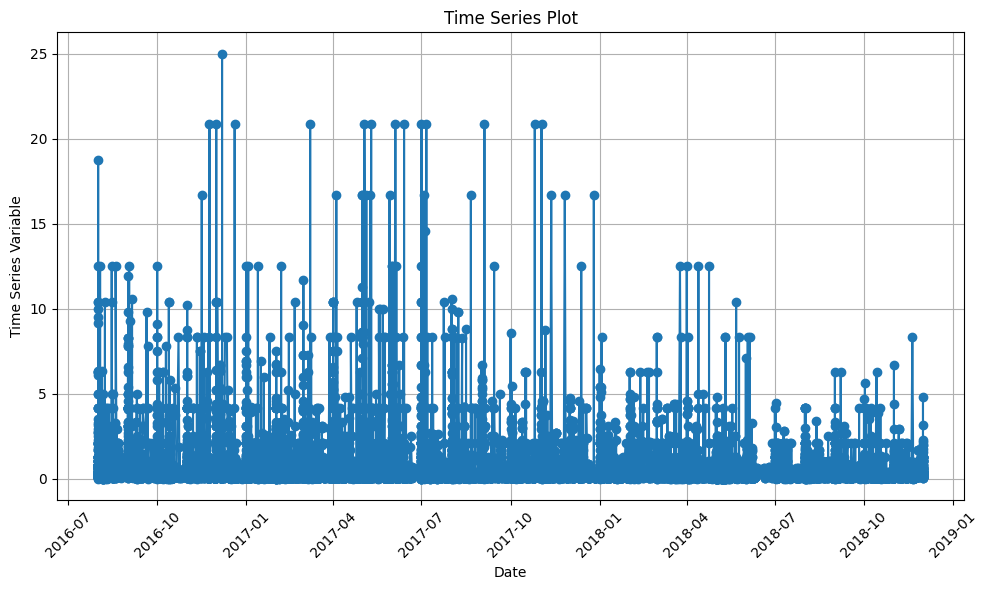

In [75]:
# Plot for "Daily" order
# Example DataFrame creation with datetime index
df_daily_plot = df.sort_index()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the time series variable
plt.plot(df_daily_plot.index, df_daily_plot['order_qty'], marker='o', linestyle='-')

# Optional: Customize the plot (labels, title, etc.)
plt.xlabel('Date')
plt.ylabel('Time Series Variable')
plt.title('Time Series Plot')
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()


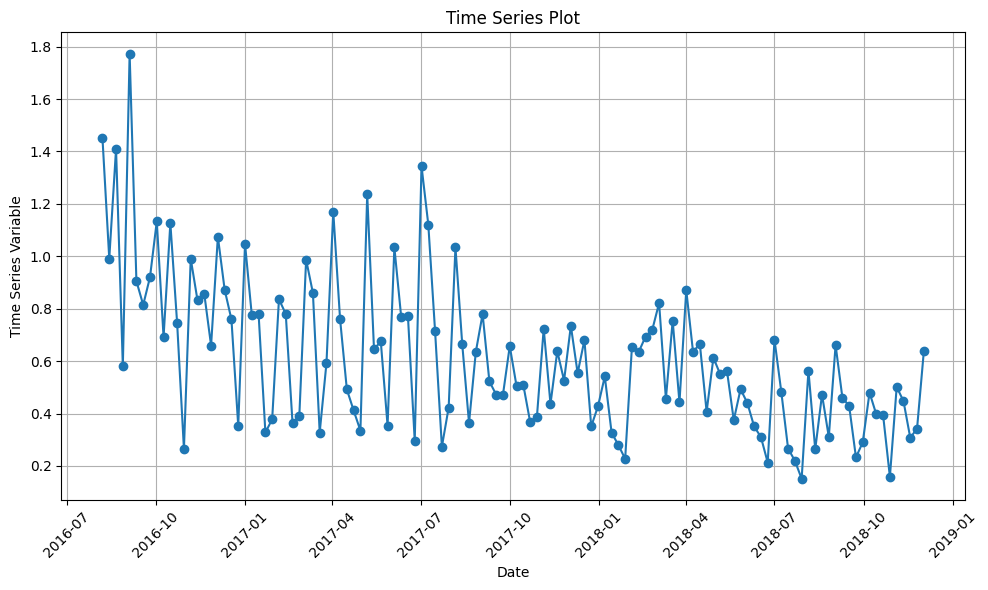

In [71]:
# Plot for "Weekly" order
# Example DataFrame creation with datetime index
date_resample_w = df.resample('W').mean()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the time series variable
plt.plot(date_resample_w.index, date_resample_w['order_qty'], marker='o', linestyle='-')

# Optional: Customize the plot (labels, title, etc.)
plt.xlabel('Date')
plt.ylabel('Time Series Variable')
plt.title('Time Series Plot')
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()


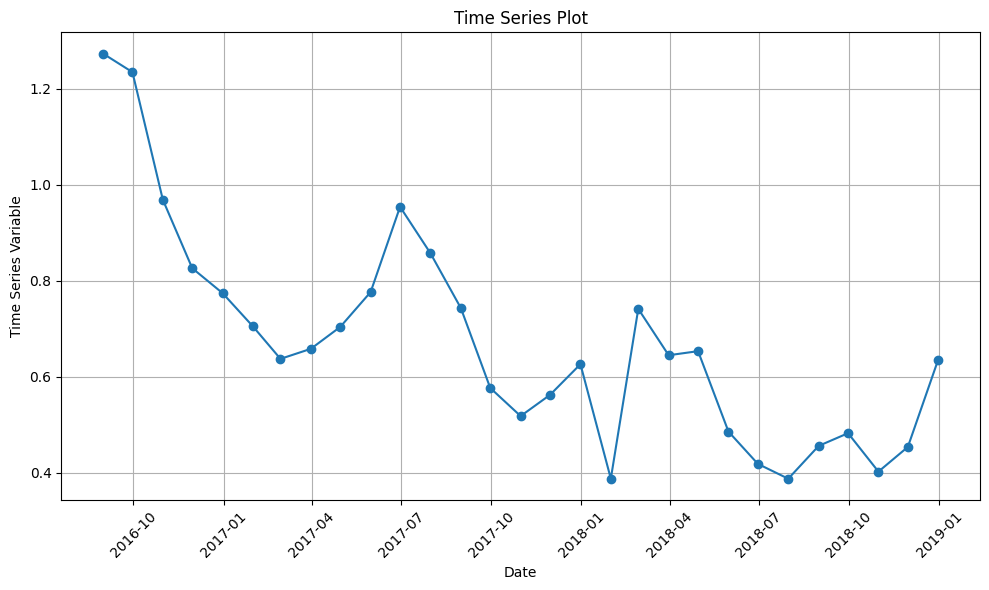

In [76]:
# Plot for "Monthly" order
# Example DataFrame creation with datetime index
date_resample_m = df.resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the time series variable
plt.plot(date_resample_m.index, date_resample_m['order_qty'], marker='o', linestyle='-')

# Optional: Customize the plot (labels, title, etc.)
plt.xlabel('Date')
plt.ylabel('Time Series Variable')
plt.title('Time Series Plot')
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()


#### Check lineplot order quantity for each product

In [78]:
df['product_id'].unique()

array(['A1', 'B2', 'C3', 'D4', 'E5', 'F6', 'G7'], dtype=object)

In [148]:
# Split dataframe for each product_id
g = globals()

for product in df['product_id'].unique():
    g[f'df_{product}'] = df[df['product_id'] == product].sort_index()
    print(f'Total transaction of Product {product} :', len(g[f'df_{product}']))

Total transaction of Product A1 : 1431
Total transaction of Product B2 : 3744
Total transaction of Product C3 : 221
Total transaction of Product D4 : 1355
Total transaction of Product E5 : 9255
Total transaction of Product F6 : 667
Total transaction of Product G7 : 448


In [146]:
# Calculate first date, last date, and range order
for product in df['product_id'].unique():
    g[f'first_order_date_{product}'] = g[f'df_{product}'].index.min()
    g[f'last_order_date_{product}'] = g[f'df_{product}'].index.max()
    g[f'range_day_{product}'] = (g[f'last_order_date_{product}'] - g[f'first_order_date_{product}']).days

    print(f'First order date for Product {product} :', g[f'first_order_date_{product}'].strftime('%Y-%m-%d'))
    print(f'Last order date for Product {product} :', g[f'last_order_date_{product}'].strftime('%Y-%m-%d'))
    print(f'Ranget order date for Product {product} :', g[f'range_day_{product}'])
    print('-------------------------------------------------------------')

First order date for Product A1 : 2018-01-11
Last order date for Product A1 : 2018-12-01
Ranget order date for Product A1 : 324
-------------------------------------------------------------
First order date for Product B2 : 2016-08-01
Last order date for Product B2 : 2018-08-11
Ranget order date for Product B2 : 740
-------------------------------------------------------------
First order date for Product C3 : 2018-02-21
Last order date for Product C3 : 2018-12-01
Ranget order date for Product C3 : 283
-------------------------------------------------------------
First order date for Product D4 : 2018-04-01
Last order date for Product D4 : 2018-12-01
Ranget order date for Product D4 : 244
-------------------------------------------------------------
First order date for Product E5 : 2016-08-01
Last order date for Product E5 : 2018-10-16
Ranget order date for Product E5 : 806
-------------------------------------------------------------
First order date for Product F6 : 2018-05-01
Last 

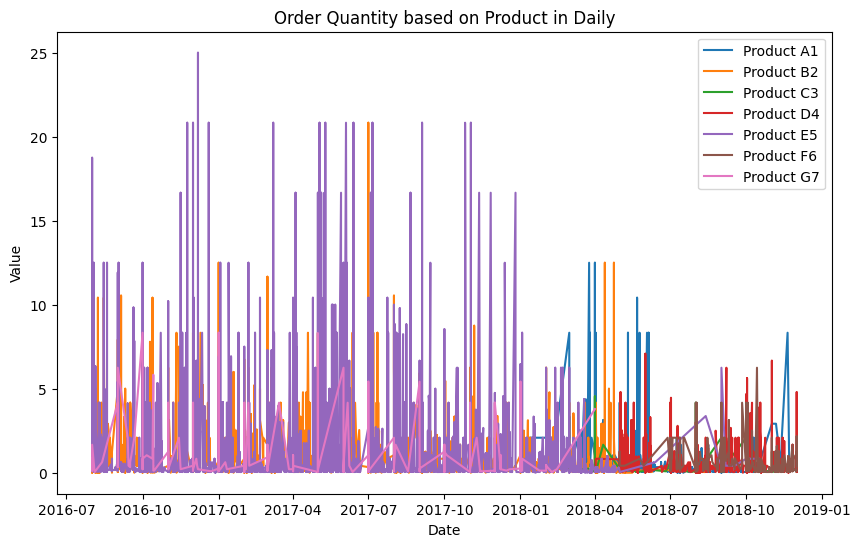

In [105]:
# Plot for "Daily" order
# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_A1.index, df_A1['order_qty'], label='Product A1')
plt.plot(df_B2.index, df_B2['order_qty'], label='Product B2')
plt.plot(df_C3.index, df_C3['order_qty'], label='Product C3')
plt.plot(df_D4.index, df_D4['order_qty'], label='Product D4')
plt.plot(df_E5.index, df_E5['order_qty'], label='Product E5')
plt.plot(df_F6.index, df_F6['order_qty'], label='Product F6')
plt.plot(df_G7.index, df_G7['order_qty'], label='Product G7')

# Customize the plot
plt.title('Order Quantity based on Product in Daily')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

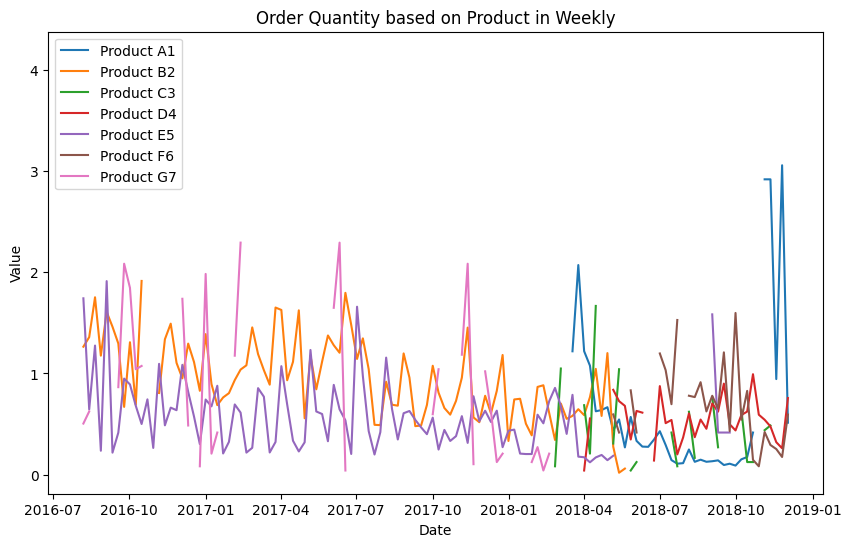

In [104]:
# Plot for "Weekly" order
for product in df['product_id'].unique():
    g[f'df_{product}_w'] = g[f'df_{product}'].resample('W').mean()

# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_A1_w.index, df_A1_w['order_qty'], label='Product A1')
plt.plot(df_B2_w.index, df_B2_w['order_qty'], label='Product B2')
plt.plot(df_C3_w.index, df_C3_w['order_qty'], label='Product C3')
plt.plot(df_D4_w.index, df_D4_w['order_qty'], label='Product D4')
plt.plot(df_E5_w.index, df_E5_w['order_qty'], label='Product E5')
plt.plot(df_F6_w.index, df_F6_w['order_qty'], label='Product F6')
plt.plot(df_G7_w.index, df_G7_w['order_qty'], label='Product G7')

# Customize the plot
plt.title('Order Quantity based on Product in Weekly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

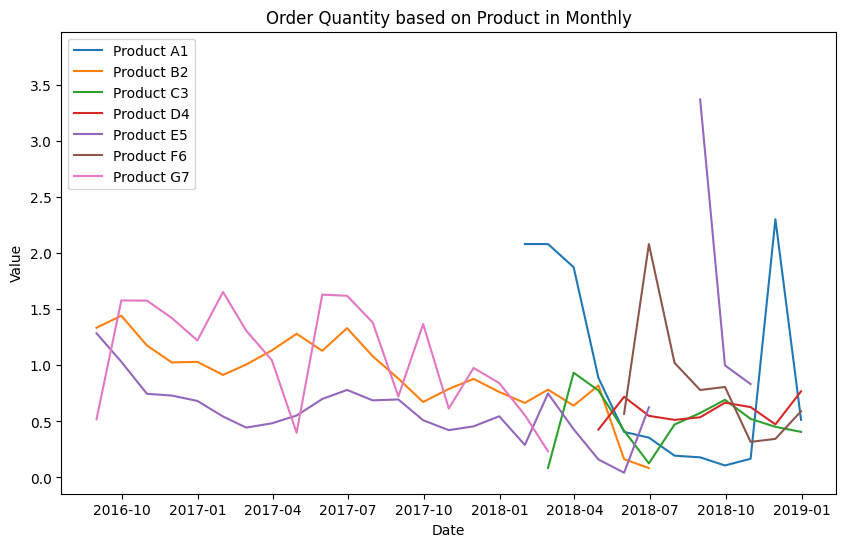

In [103]:
# Plot for "Mothly" order
for product in df['product_id'].unique():
    g[f'df_{product}_m'] = g[f'df_{product}'].resample('M').mean()

# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_A1_m.index, df_A1_m['order_qty'], label='Product A1')
plt.plot(df_B2_m.index, df_B2_m['order_qty'], label='Product B2')
plt.plot(df_C3_m.index, df_C3_m['order_qty'], label='Product C3')
plt.plot(df_D4_m.index, df_D4_m['order_qty'], label='Product D4')
plt.plot(df_E5_m.index, df_E5_m['order_qty'], label='Product E5')
plt.plot(df_F6_m.index, df_F6_m['order_qty'], label='Product F6')
plt.plot(df_G7_m.index, df_G7_m['order_qty'], label='Product G7')

# Customize the plot
plt.title('Order Quantity based on Product in Monthly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

#### Check lineplot order quantity for each store

In [106]:
df['store'].unique()

<StringArray>
['7079', '7088', '7081', '7082', '7084']
Length: 5, dtype: string

In [150]:
# Split dataframe for each store
g = globals()

for store in df['store'].unique():
    g[f'df_{store}'] = df[df['store'] == store].sort_index()
    print(f'Total transaction in Store "{store}" :', len(g[f'df_{store}']))

Total transaction in Store "7079" : 10025
Total transaction in Store "7088" : 1234
Total transaction in Store "7081" : 5170
Total transaction in Store "7082" : 669
Total transaction in Store "7084" : 23


In [151]:
# Calculate first date, last date, and range order date
for store in df['store'].unique():
    g[f'first_order_date_{product}'] = g[f'df_{product}'].index.min()
    g[f'last_order_date_{product}'] = g[f'df_{product}'].index.max()
    g[f'range_day_{product}'] = (g[f'last_order_date_{product}'] - g[f'first_order_date_{product}']).days

    print(f'First order date for Product {product} :', g[f'first_order_date_{product}'].strftime('%Y-%m-%d'))
    print(f'Last order date for Product {product} :', g[f'last_order_date_{product}'].strftime('%Y-%m-%d'))
    print(f'Ranget order date for Product {product} :', g[f'range_day_{product}'])
    print('-------------------------------------------------------------')

First order date for store 7079 : 2016-08-01
Last order date for store 7079 : 2018-12-01
Ranget order date for store 7079 : 852
-------------------------------------------------------------
First order date for store 7088 : 2016-08-01
Last order date for store 7088 : 2018-11-27
Ranget order date for store 7088 : 848
-------------------------------------------------------------
First order date for store 7081 : 2016-08-01
Last order date for store 7081 : 2018-12-01
Ranget order date for store 7081 : 852
-------------------------------------------------------------
First order date for store 7082 : 2016-08-01
Last order date for store 7082 : 2018-12-01
Ranget order date for store 7082 : 852
-------------------------------------------------------------
First order date for store 7084 : 2016-08-01
Last order date for store 7084 : 2016-08-18
Ranget order date for store 7084 : 17
-------------------------------------------------------------


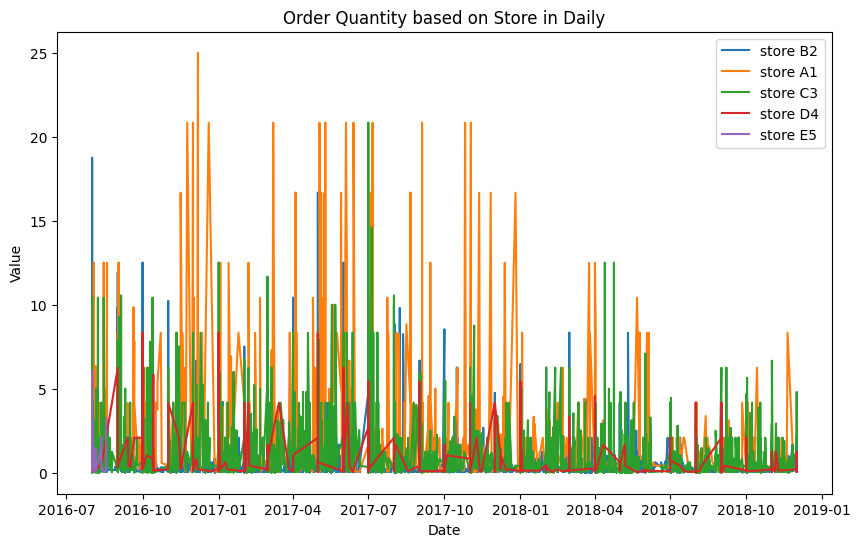

In [153]:
# Plot for "Daily" order
# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_7079.index, df_7079['order_qty'], label='store B2')
plt.plot(df_7088.index, df_7088['order_qty'], label='store A1')
plt.plot(df_7081.index, df_7081['order_qty'], label='store C3')
plt.plot(df_7082.index, df_7082['order_qty'], label='store D4')
plt.plot(df_7084.index, df_7084['order_qty'], label='store E5')

# Customize the plot
plt.title('Order Quantity based on Store in Daily')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

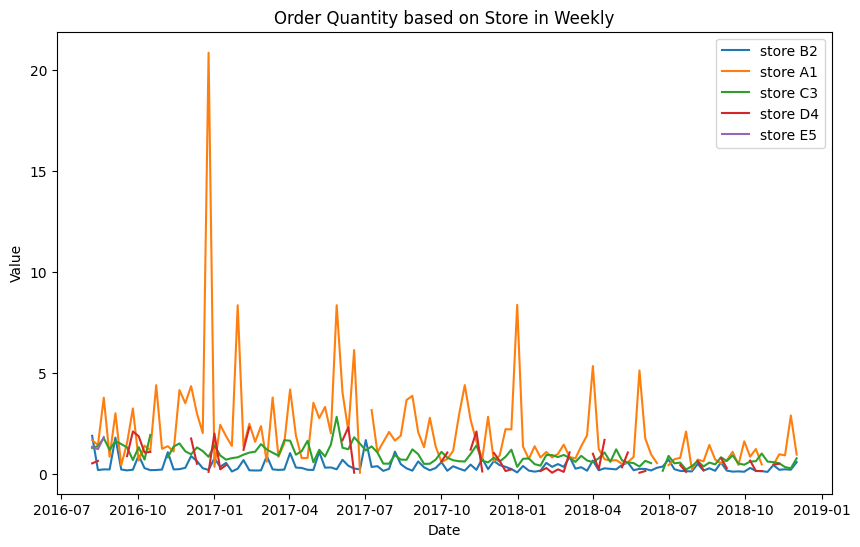

In [156]:
# Plot for "Weekly" order
for store in df['store'].unique():
    g[f'df_{store}_w'] = g[f'df_{store}'].resample('W').mean()

# Plot for "Weekly" order
# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_7079_w.index, df_7079_w['order_qty'], label='store B2')
plt.plot(df_7088_w.index, df_7088_w['order_qty'], label='store A1')
plt.plot(df_7081_w.index, df_7081_w['order_qty'], label='store C3')
plt.plot(df_7082_w.index, df_7082_w['order_qty'], label='store D4')
plt.plot(df_7084_w.index, df_7084_w['order_qty'], label='store E5')

# Customize the plot
plt.title('Order Quantity based on Store in Weekly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

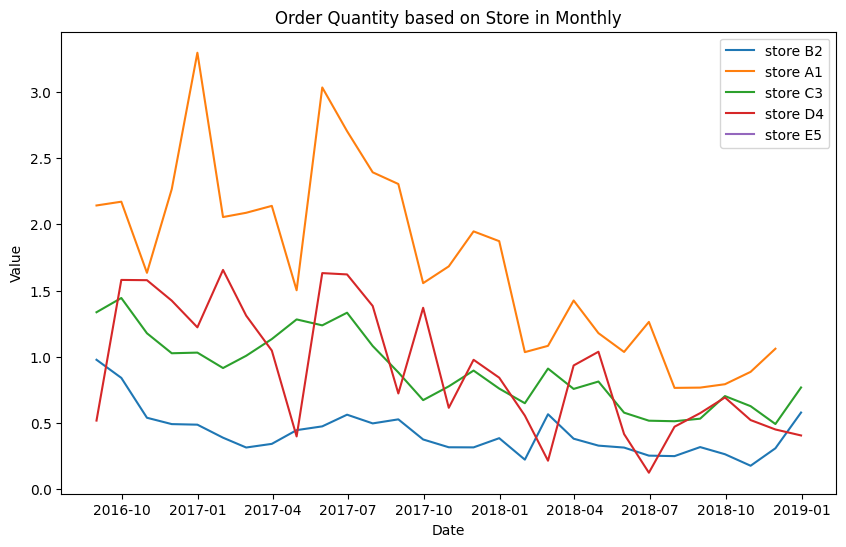

In [157]:
# Plot for "Monthly" order
for store in df['store'].unique():
    g[f'df_{store}_m'] = g[f'df_{store}'].resample('M').mean()

# Plot for "Weekly" order
# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_7079_m.index, df_7079_m['order_qty'], label='store B2')
plt.plot(df_7088_m.index, df_7088_m['order_qty'], label='store A1')
plt.plot(df_7081_m.index, df_7081_m['order_qty'], label='store C3')
plt.plot(df_7082_m.index, df_7082_m['order_qty'], label='store D4')
plt.plot(df_7084_m.index, df_7084_m['order_qty'], label='store E5')

# Customize the plot
plt.title('Order Quantity based on Store in Monthly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

### Split Dataset